# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading in the "Titanic Train" dataset. Please make sure you point Pandas to the right location on your system

In [2]:
train = pd.read_csv('/Users/mikelakoju/Documents/Cardiff Metropolitan Uni/2020/CIS7031/Titanic_dataset_Jupyter_notebook/titanic/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Lets check if we have missing data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


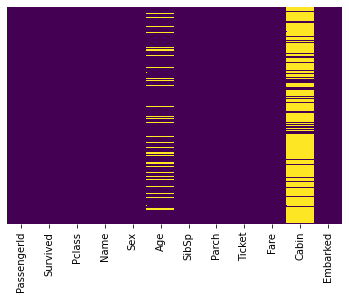

In [5]:
# Every yellow line indicates true (meaning where we have null values)

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## ****  From the plot above, we can visually see that we have some null values in the "Age" and a lot more null values in "Cabin",  you will need to decide on how to deal with both of them. For instance, you may choose to exclude "Cabin" entirely from your analysis or create dummy values (zero for no information of Cabin or 1 for having Cabin information). Also, we can decide to use an aggregate of the ages to fix the missing ages. Or exclude the rows that have missing "Ages".

In [6]:
sns.set_style('whitegrid')

# Let's get a visual idea of Survivers

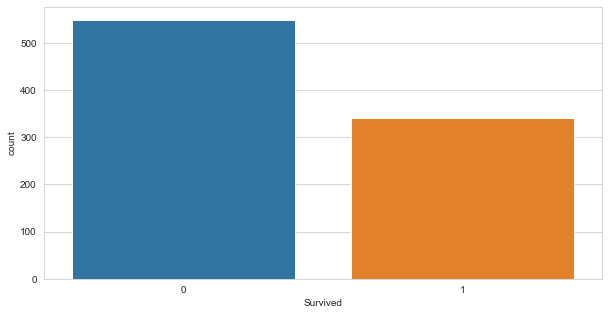

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived',data=train)

# Let's get a visual idea of Survivers based on males and females

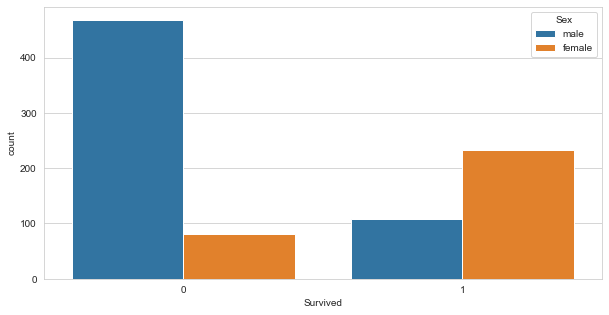

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived',hue='Sex',data=train)

### *** From the above plot, we can begin to see that there seems to be some trend. It looks like people onboard that were females were more likely to survive when compared to men. You can decide to do some further analysis on this.

# We can still do some more visual explorations on the passenger class.

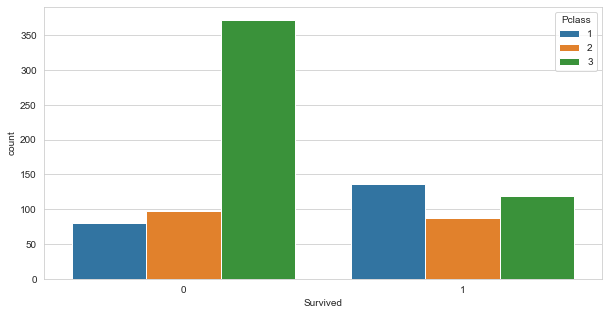

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived',hue='Pclass',data=train)
plt.show()

### *** We can see some trend here also from this plot, a large majority of people in the 3rd class did not survive. This was the cheapest class to get into. We can also see that amongst the number of people that survived a good number of them came from the higher classes (1 and 2). But it would be helpful to know the number of people that were in each class. 

# Let's also check the ages of people on the Titanic

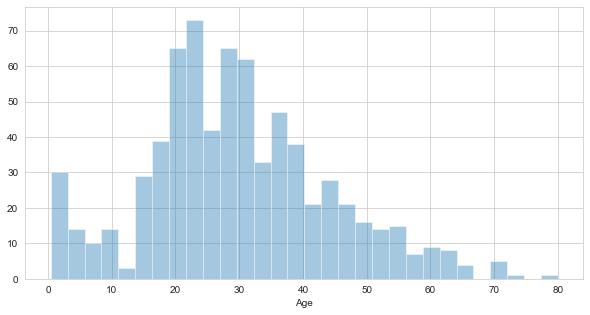

In [10]:
# use a histogram to visualize this. We will also just drop null values for now

plt.figure(figsize=(10,5))
sns.distplot(train['Age'].dropna(),kde=False, bins =30)

### *** This is an interesting plot. We seem to have almost a bimodal distribution where we have a few children between the ages of 0 and 10. After that, we begin to get an average Age between 20 and 30.

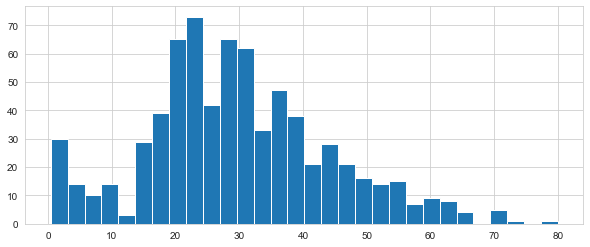

In [11]:
# **** We can create this same plot with Matplotlib as shown below

plt.figure(figsize=(10,4))
plt.hist(train['Age'].dropna(),bins=30)

plt.show()

In [12]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Let's explore the number of siblings or spouses on board

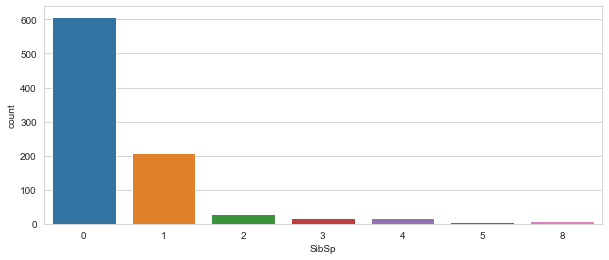

In [13]:
plt.figure(figsize=(10,4))
sns.countplot(x='SibSp',data=train)

### *** From this plot, we can immediately see that most people on board did not have a sibling or a spouse on board

# We can also have a look at the "Fare". How much people paid. We can use a histogram for this

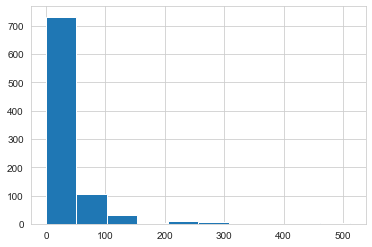

In [14]:
train['Fare'].hist()
plt.show()

### ****With this first histogram plot above, we can see that we have a wide range of values. with a large spread between 0 and 100. WE can increase the number of bins to get some more inisght into this

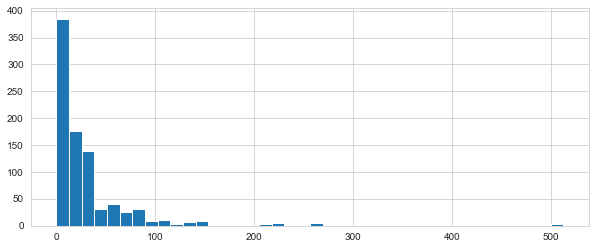

In [15]:
train['Fare'].hist(bins=40,figsize=(10,4))
plt.show()

### *** From the above plot, we can see that a good majority of the purchases were between 0 and 50. Remember from our exploration above. We recall that more people in the lower class died. This plot confirms that we have more people paying a lower fare.

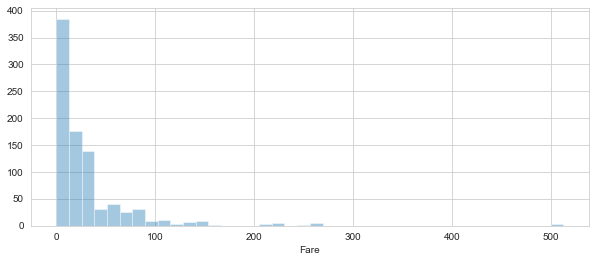

In [16]:
# * We can also use Seaborn to create the same plot above

plt.figure(figsize=(10,4))
sns.distplot(train['Fare'],kde=False, bins=40)

# We can also do this same plot interactively, using Cufflinks. However, you will need to install the library

In [17]:
import cufflinks as cf

In [18]:
# This is telling cufflinks that we want to operate offline
cf.go_offline()

In [19]:
train['Fare'].iplot(kind='hist',bins=40)